
# Problem Statement

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
import en_core_web_sm
nlp = en_core_web_sm.load()
# Import Textblob for extracting noun phrases
# !pip install textblob
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Installing wordcloud
# !pip install wordcloud
# importance of each word and its frequency

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold


import xgboost as xgb
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')



In [4]:
# Import pickle to save and load the model
import pickle

In [5]:
# Setting max rows and columns 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

# pd.options.display.max_colwidth = 300
# pd.options.display.precision = 2

# Loading Data

In [6]:
df_reviews = pd.read_csv("/content/sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

# Missing Value Treatment

In [8]:
100 * (df_reviews.isnull().sum()/len(df_reviews.index))

id                       0.000000
brand                    0.000000
categories               0.000000
manufacturer             0.470000
name                     0.000000
reviews_date             0.153333
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_rating           0.000000
reviews_text             0.000000
reviews_title            0.633333
reviews_userCity        93.570000
reviews_userProvince    99.433333
reviews_username         0.210000
user_sentiment           0.003333
dtype: float64

## Removing columns with more than 40% missing values

In [9]:
df_reviews = df_reviews.loc[: , 100 * (df_reviews.isnull().sum()/len(df_reviews.index)) <40]

In [10]:
100 * (df_reviews.isnull().sum()/len(df_reviews.index))

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.470000
name                   0.000000
reviews_date           0.153333
reviews_doRecommend    8.566667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.633333
reviews_username       0.210000
user_sentiment         0.003333
dtype: float64

## Missing value Treatment for columns with low missing data

In [11]:
df_reviews[df_reviews['user_sentiment'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


Since there is only one null column, based on the reviews_title and reviews_text we can assign user_sentiment as Positive

In [12]:
df_reviews.loc[df_reviews['user_sentiment'].isnull() , "user_sentiment"] = 'Positive'

In [13]:
100 * (df_reviews.isnull().sum()/len(df_reviews.index))

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.470000
name                   0.000000
reviews_date           0.153333
reviews_doRecommend    8.566667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.633333
reviews_username       0.210000
user_sentiment         0.000000
dtype: float64

In [14]:
df_reviews[df_reviews['reviews_title'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish De...",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Spa...",2017-11-16T08:12:30.000Z,True,5,Great quality and a great price,NaN,queen 79,Positive
1441,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,NaN,3,Wanted to love this but it's a bit too heavy f...,NaN,julie,Positive
1442,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2015-02-09T00:00:00Z,NaN,3,I have thick coarse hair and for me this just ...,NaN,lisa,Negative
1443,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,NaN,3,Wanted to love this but it's a bit too heavy f...,NaN,julie,Positive
1444,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2017-11-27T18:18:38.000Z,True,4,I actually really enjoy this conditioner. Have...,NaN,aland,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
28790,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2014-02-28T00:00:00Z,NaN,5,I have fine hair and don't like heavy hairspra...,NaN,linny,Positive
28791,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2014-09-04T00:00:00Z,NaN,5,I tried this product for the first time im ver...,NaN,marcos,Positive
28792,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2015-04-17T00:00:00Z,NaN,5,I am an African American woman who has been na...,NaN,natural1,Positive
28793,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2014-06-24T00:00:00Z,NaN,5,works great! Actually holds my hard-to-hold-in...,NaN,henry,Positive


In [15]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_doRecommend  27430 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_title        29810 non-null  object
 10  reviews_username     29937 non-null  object
 11  user_sentiment       30000 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


In [16]:
df_reviews = df_reviews[~df_reviews['reviews_title'].isna()]

In [17]:
df_reviews.shape

(29810, 12)

In [18]:
df_reviews[df_reviews['reviews_username'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
1453,AVpe_N91LJeJML43z4jD,Way Basics,"Home,Kids' Home,Girls' Room,Girls' Room Furnit...",Way Basics,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,2011-07-08T00:00:00Z,NaN,4,"We like this shelf, and found it relatively ea...",Way Basics 3-Shelf Storage Unit in Espresso Wo...,NaN,Positive
1531,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2011-10-30T05:00:00Z,NaN,5,I'm very sensitive to fragrance - most give me...,Wonderful,NaN,Positive
1532,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2013-07-19T05:00:00Z,NaN,5,Not all shower gels leave their smell after yo...,Smell stays on your skin,NaN,Positive
1787,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),NaN,NaN,2,"Not one of Elvis's best movies, but it has som...",Purely for Elvis fans...,NaN,Positive
1792,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),NaN,NaN,4,"Like every 1966-67 Elvis movie, you have prett...","If you like EP, you'll love this one",NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
26489,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2013-06-11T00:00:00Z,NaN,1,Have used this several times on my 7 month old...,Wouldn't recommend for babies with sensitive skin,NaN,Positive
26497,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2014-06-15T00:00:00Z,NaN,1,My daughter has really sensitive skin. I appli...,Did not work at all.,NaN,Positive
26619,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2015-03-12T03:15:19.000Z,True,5,This is the first sunscreen I am able to use o...,Solved A Long Term Problem For Me!,NaN,Positive
26633,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2014-01-11T00:00:00Z,NaN,5,This goes on smoothly and does not flake. My s...,Good all over and all-day protection.,NaN,Positive


In [19]:
df_reviews = df_reviews[~df_reviews['reviews_username'].isna()]

In [20]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29748 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29748 non-null  object
 1   brand                29748 non-null  object
 2   categories           29748 non-null  object
 3   manufacturer         29607 non-null  object
 4   name                 29748 non-null  object
 5   reviews_date         29708 non-null  object
 6   reviews_doRecommend  27372 non-null  object
 7   reviews_rating       29748 non-null  int64 
 8   reviews_text         29748 non-null  object
 9   reviews_title        29748 non-null  object
 10  reviews_username     29748 non-null  object
 11  user_sentiment       29748 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.0+ MB


In [21]:
df_reviews.shape

(29748, 12)

In [22]:
len(df_reviews.index)

29748

In [23]:
100 * (df_reviews.isnull().sum()/len(df_reviews.index))

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.473981
name                   0.000000
reviews_date           0.134463
reviews_doRecommend    7.987092
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.000000
reviews_username       0.000000
user_sentiment         0.000000
dtype: float64

In [24]:
df_reviews = df_reviews[~df_reviews['manufacturer'].isna()]

In [25]:
df_reviews = df_reviews[~df_reviews['reviews_date'].isna()]

In [26]:
100 * (df_reviews.isnull().sum()/len(df_reviews.index))

id                     0.0000
brand                  0.0000
categories             0.0000
manufacturer           0.0000
name                   0.0000
reviews_date           0.0000
reviews_doRecommend    7.9007
reviews_rating         0.0000
reviews_text           0.0000
reviews_title          0.0000
reviews_username       0.0000
user_sentiment         0.0000
dtype: float64

In [27]:
df_reviews[df_reviews['reviews_date'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment


In [28]:
df_reviews['manufacturer'].value_counts()

Clorox                                8525
Test                                  3324
AmazonUs/CLOO7                        2039
L'oreal Paris                         1232
Walt Disney                           1140
                                      ... 
Rizzy Rugs                               1
Herr's                                   1
Pacific Foods of Oregon, Inc.            1
Unfi                                     1
Universal Music Group / Cash Money       1
Name: manufacturer, Length: 211, dtype: int64

# Converting variables to correct Datatypes

In [29]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29567 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29567 non-null  object
 1   brand                29567 non-null  object
 2   categories           29567 non-null  object
 3   manufacturer         29567 non-null  object
 4   name                 29567 non-null  object
 5   reviews_date         29567 non-null  object
 6   reviews_doRecommend  27231 non-null  object
 7   reviews_rating       29567 non-null  int64 
 8   reviews_text         29567 non-null  object
 9   reviews_title        29567 non-null  object
 10  reviews_username     29567 non-null  object
 11  user_sentiment       29567 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.9+ MB


In [30]:
df_reviews['brand'] = df_reviews['brand'].astype(str)
df_reviews['categories'] = df_reviews['categories'].astype(str)
df_reviews['manufacturer'] = df_reviews['manufacturer'].astype(str)
df_reviews['name'] = df_reviews['name'].astype(str)
df_reviews['reviews_text'] = df_reviews['reviews_text'].astype(str)
df_reviews['reviews_title'] = df_reviews['reviews_title'].astype(str)
df_reviews['reviews_username'] = df_reviews['reviews_username'].astype(str)

In [32]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29567 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29567 non-null  object
 1   brand                29567 non-null  object
 2   categories           29567 non-null  object
 3   manufacturer         29567 non-null  object
 4   name                 29567 non-null  object
 5   reviews_date         29567 non-null  object
 6   reviews_doRecommend  27231 non-null  object
 7   reviews_rating       29567 non-null  int64 
 8   reviews_text         29567 non-null  object
 9   reviews_title        29567 non-null  object
 10  reviews_username     29567 non-null  object
 11  user_sentiment       29567 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.9+ MB


In [33]:
df_reviews['reviews_date']

0        2012-11-30T06:21:45.000Z
1        2017-07-09T00:00:00.000Z
2        2017-07-09T00:00:00.000Z
3        2016-01-06T00:00:00.000Z
4        2016-12-21T00:00:00.000Z
                   ...           
29995    2017-01-23T00:00:00.000Z
29996    2017-01-27T00:00:00.000Z
29997    2017-01-21T00:00:00.000Z
29998    2017-01-11T00:00:00.000Z
29999    2017-01-19T00:00:00.000Z
Name: reviews_date, Length: 29567, dtype: object

# Exploratory Data Analysis

## Class Imbalance

In [34]:
df_reviews['user_sentiment'].value_counts(normalize = True)

Positive    0.888254
Negative    0.111746
Name: user_sentiment, dtype: float64

We see that there is HIGH IMBALANCE in User Sentiment


<Axes: ylabel='user_sentiment'>

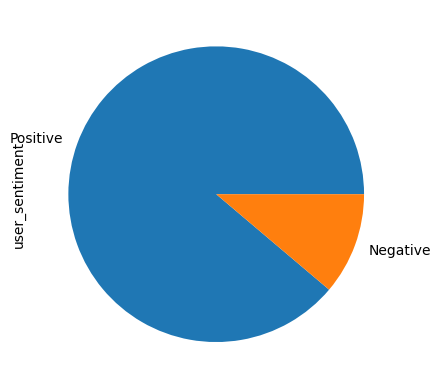

In [35]:
df_reviews['user_sentiment'].value_counts(normalize = True).plot.pie()

Mapping the User_Sentiment of Positive and Negative to 1 and 0 respectively

In [36]:
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive':1,'Negative':0})

<Axes: xlabel='user_sentiment', ylabel='count'>

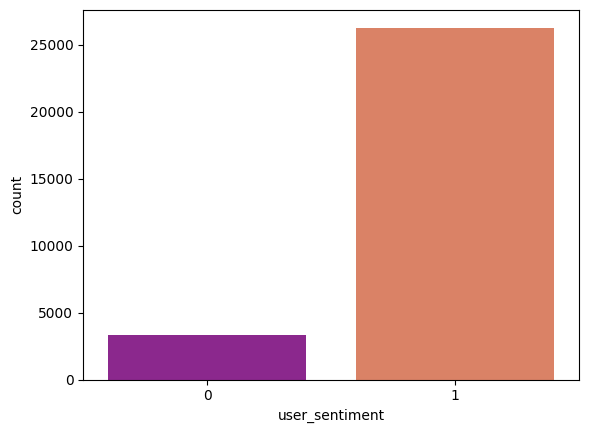

In [37]:
sns.countplot( x='user_sentiment' , data = df_reviews ,palette = 'plasma')

In [38]:
df_reviews['reviews_rating'].value_counts()

5    20567
4     5933
1     1357
3     1309
2      401
Name: reviews_rating, dtype: int64

<Axes: xlabel='reviews_rating', ylabel='count'>

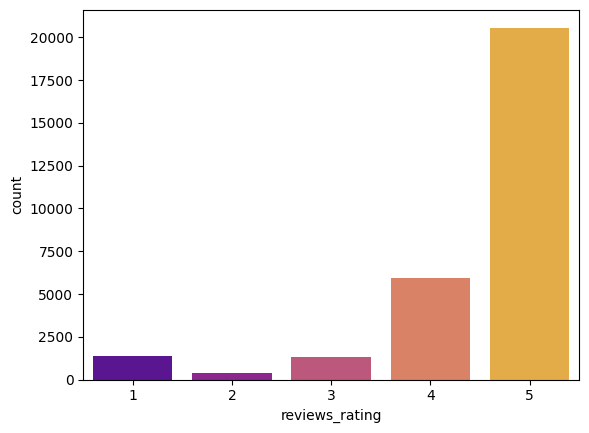

In [39]:
sns.countplot( x='reviews_rating' , data = df_reviews ,palette = 'plasma')

In [40]:
df_reviews[df_reviews['user_sentiment']==1]['reviews_rating'].describe()

count    26263.000000
mean         4.562579
std          0.862819
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [41]:
df_reviews[df_reviews['user_sentiment']==0]['reviews_rating'].describe()

count    3304.000000
mean        3.881961
std         1.535133
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

From above, we observe that there exist some lowest rating for positive user sentiment and some highest rating for negative user sentiment

In [43]:
pivot = pd.crosstab(df_reviews['user_sentiment'],df_reviews['reviews_rating'])

print(pivot)

reviews_rating    1    2     3     4      5
user_sentiment                             
0               582  135   213   535   1839
1               775  266  1096  5398  18728


In [44]:
df_reviews[(df_reviews['user_sentiment']==0)& (df_reviews['reviews_rating']>=4)][['reviews_title','reviews_text']]

,reviews_title,reviews_text
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...
96,This product has made a real difference on my ...,In only a week I can see the difference in my ...
100,Noticed a difference in just two weeks!,This product has made my skin smoother and sup...
106,Very rich cream,I like to use this cream on my neck and collar...
117,Not greasy,I finally found a moisturizing product that wi...
...,...,...
29818,Great Product,I received a complimentary sample of this prod...
29855,Great,This has prolonged the color in my hair! Not o...
29858,Makes my hair soft and shiny without excess oil!,This conditioner makes my hair very soft witho...
29862,Great Conditioner,This conditioner has become a staple in my hai...


In [45]:
df_reviews[(df_reviews['user_sentiment']==1)& (df_reviews['reviews_rating'] <4)][['reviews_title','reviews_text']]

,reviews_title,reviews_text
9,Don't buy,Got as a surprise for my husband there is noth...
11,Waste of Money,Purchased this thinking it would have some sor...
14,Disappointed,First time purchase of this type of product. M...
18,Pretty nice,I bought this because it had better reviews th...
54,New formula is terrible,I used (and loved) this product for several ye...
...,...,...
29050,Didn't Do Much For Dryness,I received this product from Influenster. I ab...
29051,Not the best,I used this product for a month straight befor...
29053,clay conditioning,Got this item as a compliment from influenster...
29054,Eh,I am not in love with the conditioner. The cla...


In [46]:
df_reviews.loc[(df_reviews['user_sentiment']==0)& (df_reviews['reviews_rating']>=4) , "user_sentiment"] = 1

In [47]:
df_reviews.loc[(df_reviews['user_sentiment']==1)& (df_reviews['reviews_rating']<4) , "user_sentiment"] = 0

In [48]:
pivot = pd.crosstab(df_reviews['user_sentiment'],df_reviews['reviews_rating'])

print(pivot)

reviews_rating     1    2     3     4      5
user_sentiment                              
0               1357  401  1309     0      0
1                  0    0     0  5933  20567


## Data Analysis

In [49]:
df_reviews['brand'].value_counts()

Clorox                   10564
Warner Home Video         3324
Disney                    1197
L'oreal Paris             1186
FOX                        887
                         ...  
Rizzy Home                   1
Pacific Natural Foods        1
Noosa                        1
Southern Enterprises         1
Universal Music              1
Name: brand, Length: 197, dtype: int64

### Top 10 most liked and disliked Brands

In [50]:
liked = df_reviews[df_reviews['user_sentiment']==1]

In [51]:
disliked = df_reviews[df_reviews['user_sentiment']==0]

In [52]:
liked[liked['reviews_rating']==5].groupby('brand')['brand'].count().sort_values(ascending=False)[:10]

brand
Clorox                  8906
Warner Home Video       1739
Disney                   884
Burt's Bees              690
Sony Pictures            619
Olay                     500
FOX                      473
Summit Entertainment     465
Universal Home Video     426
Lundberg                 362
Name: brand, dtype: int64

In [53]:
disliked[disliked['reviews_rating']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10]

brand
Nexxus                        603
Clear Scalp & Hair Therapy    169
Aveeno                         85
Windex                         50
Warner Home Video              37
Clorox                         29
Burt's Bees                    24
L'oreal Paris                  22
Hoover                         21
Storkcraft                     16
Name: brand, dtype: int64

# Text Processing

In [54]:
df_clean = df_reviews[['id','name', 'reviews_text', 'user_sentiment']]

## Removing Punctuation

In [55]:
# function to clean the text and remove all the unnecessary elements.

def clean_text(sent):
  sent = sent.lower()
  pattern ='[^\w\s]'
  sent = re.sub(pattern , '' ,sent)
  pattern='\w*\d\w*'
  sent = re.sub(pattern , '' ,sent)
  return sent


In [56]:
df_clean['reviews_clean'] = df_clean['reviews_text'].apply(clean_text)
df_clean.head()

,id,name,reviews_text,user_sentiment,reviews_clean
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,1,i love this album its very good more to the hi...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,1,good flavor this review was collected as part ...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,1,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,0,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,0,my husband bought this gel for us the gel caus...


## Stop word Removal

In [57]:
stop_words = set(stopwords.words('english'))

In [58]:
def stopword_removal(sent):
  sent = sent.lower()
  word_tokens = word_tokenize(sent)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return " ".join(filtered_sentence)



In [59]:
df_clean['reviews_stop_rem'] = df_clean['reviews_clean'].apply(stopword_removal)
df_clean.head()

,id,name,reviews_text,user_sentiment,reviews_clean,reviews_stop_rem
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,1,i love this album its very good more to the hi...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,1,good flavor this review was collected as part ...,good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,1,good flavor,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,0,i read through the reviews on here before look...,read reviews looking buying one couples lubric...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,0,my husband bought this gel for us the gel caus...,husband bought gel us gel caused irritation fe...


## Lemmatization

In [60]:
#function to Lemmatize the texts
def lemmatize_text(text):
  sent = []
  doc = nlp(text)
  for token in doc:
    sent.append(token.lemma_)
  return " ".join(sent)  

In [61]:
df_clean['reviews_lemmatize'] = df_clean['reviews_stop_rem'].apply(lemmatize_text)
df_clean.head()

,id,name,reviews_text,user_sentiment,reviews_clean,reviews_stop_rem,reviews_lemmatize
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,1,i love this album its very good more to the hi...,love album good hip hop side current pop sound...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,1,good flavor this review was collected as part ...,good flavor review collected part promotion,good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,1,good flavor,good flavor,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,0,i read through the reviews on here before look...,read reviews looking buying one couples lubric...,read review look buy one couple lubricant ulti...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,0,my husband bought this gel for us the gel caus...,husband bought gel us gel caused irritation fe...,husband buy gel us gel cause irritation feel l...


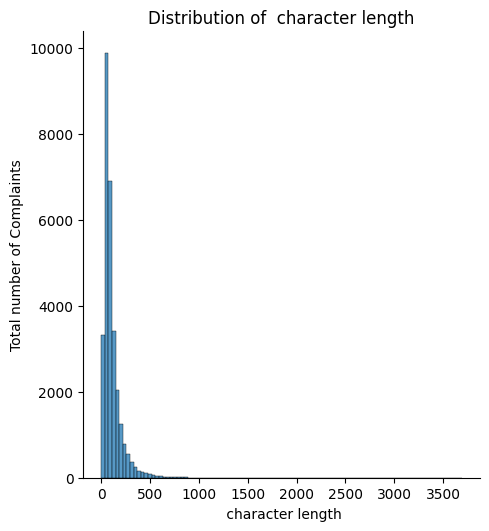

In [62]:
# visualise the data according to the 'Reviews' character length

char_len = [len(each_sent) for each_sent in df_clean['reviews_lemmatize']]

sns.displot(char_len, kind='hist', bins=100)
plt.xlabel(" character length")
plt.ylabel("Total number of Complaints")
plt.title("Distribution of  character length")
plt.show()

In [63]:
df_clean.head()

,id,name,reviews_text,user_sentiment,reviews_clean,reviews_stop_rem,reviews_lemmatize
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,1,i love this album its very good more to the hi...,love album good hip hop side current pop sound...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,1,good flavor this review was collected as part ...,good flavor review collected part promotion,good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,1,good flavor,good flavor,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,0,i read through the reviews on here before look...,read reviews looking buying one couples lubric...,read review look buy one couple lubricant ulti...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,0,my husband bought this gel for us the gel caus...,husband bought gel us gel caused irritation fe...,husband buy gel us gel cause irritation feel l...


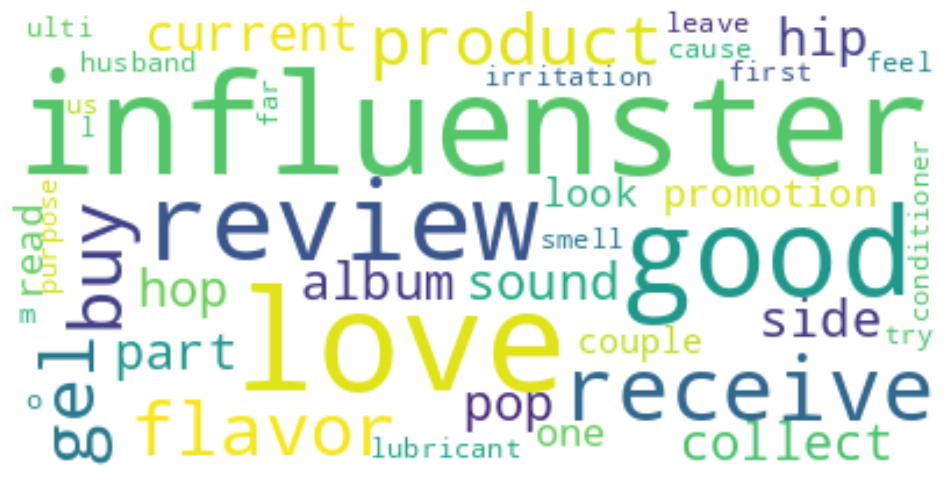

In [64]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(df_clean['reviews_lemmatize']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
# Saving the cleaned dataframe as csv
df_clean.to_csv('clean_df.csv')

# Feature Extraction

## TF-IDF Vectorizer

In [66]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english',ngram_range=(1,2))
X= tfidf.fit_transform(df_clean['reviews_lemmatize'])
y=df_clean['user_sentiment']

In [67]:
print(tfidf.get_feature_names_out())

['aaron' 'aaron taylor' 'ability' ... 'zombie action' 'zombie movie'
 'zone']


In [68]:
pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

,aaron,aaron taylor,ability,ability clean,able,able clean,able day,able disinfect,able grab,able make,able product,able pull,able try,able use,able watch,abrasive,absolute,absolute favorite,absolute good,absolutely,absolutely adore,absolutely amazing,absolutely good,absolutely hilarious,absolutely love,...,young son,youth,youthful,youtube,yr,yr old,yrs,yrs old,yuck,yucky,yum,yummy,zac,zac efron,zach,zach efron,zero,zilla,zinc,ziploc,ziploc bag,zombie,zombie action,zombie movie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Saving the the tfidf vectorizer model
tfidf_vectorizer = pickle.dump(tfidf, open("tfidf_vectorizer.pkl","wb"))

# Train Test Split

In [70]:
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state= 42,test_size=0.25)

In [74]:
X_train.shape 

(22175, 13971)

In [75]:
X_test.shape

(7392, 13971)

# Handling Class Imbalance

In [76]:
df_clean['user_sentiment'].value_counts(normalize=True)

1    0.896269
0    0.103731
Name: user_sentiment, dtype: float64

## SMOTE

Applying SMOTE technique on train data set to handle Class Imbalance

In [78]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

X_train,y_train = sm.fit_resample(X_train,y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 19863, 0: 19863})
After Counter({1: 19863, 0: 19863})


# Model Building

In [79]:
# Function to display scores
def evaluation_scores(classifier, X_test, y_test):

  # Calculating Predicted value
  y_pred = classifier.predict(X_test)

  # Create confusion matrix
  conf_m = confusion_matrix(y_test, y_pred)



  # Calculating the values of True Positives, True Negatives, False Positivies and False Negatives
  TP = conf_m[1][1]
  TN = conf_m[0][0]
  FP = conf_m[0][1]
  FN = conf_m[1][0]

  # Calculating Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracy = round(accuracy,2)
  
  # Calculating Sensitivity/Recall
  sensitivity_recall = (TP / float(TP + FN))
  sensitivity_recall = round(sensitivity_recall,2)
  
  # Calculating Specificity
  specificity = (TN / float(TN + FP))
  specificity = round(specificity,2)  
  
  # Calculating Precision
  precision = (TN / float(TN + FP))
  precision = round(precision,2)  
  
  # Calculating F_1 score
  F1_score = 2 * ((precision * sensitivity_recall) / (precision + sensitivity_recall))
  F1_score = round(F1_score,2)  
  
  print("Evaluation Score Summary")
  print('-'*50)
  print(f'Accuracy Score: {round(accuracy,2)}')
  print(f'Sensitivity/Recall Score: {round(sensitivity_recall,2)}') 
  print(f'Specificity Score: {round(specificity,2)}') 
  print(f'Precision: {round(precision,2)}')
  print(f'F1 Score: {round(F1_score,2)}')
  print('-'*50)

  # Returning evaluation results for comparison later
  evaluation_metrics = []
  evaluation_metrics.append(accuracy)
  evaluation_metrics.append(sensitivity_recall)
  evaluation_metrics.append(specificity)
  evaluation_metrics.append(precision)
  evaluation_metrics.append(F1_score)
  
  return evaluation_metrics

## Logistic Regression

In [80]:
# Logistic Regression
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [81]:
# Getting the score of the base model
lr_metrics = evaluation_scores(logreg, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.9
Sensitivity/Recall Score: 0.92
Specificity Score: 0.73
Precision: 0.73
F1 Score: 0.81
--------------------------------------------------


### HyperParameter Tuning

In [82]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.939065 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [83]:
lr_tuned_metrics = evaluation_scores(grid_search, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.97
Sensitivity/Recall Score: 1.0
Specificity Score: 0.78
Precision: 0.78
F1 Score: 0.88
--------------------------------------------------


## Naive Bayes

In [84]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
gnb_y_pred = gnb.predict(X_test.toarray())

In [85]:
gnb_metrics = evaluation_scores(gnb, X_test.toarray(), y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.8
Sensitivity/Recall Score: 0.82
Specificity Score: 0.55
Precision: 0.55
F1 Score: 0.66
--------------------------------------------------


## Random Forest

In [86]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

In [87]:
rfc_metrics = evaluation_scores(rfc, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.93
Sensitivity/Recall Score: 0.97
Specificity Score: 0.5
Precision: 0.5
F1 Score: 0.66
--------------------------------------------------


### Hyperparameter Tuning

In [88]:
hyper_params = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(10, 50, 5),
           }

rf_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                param_distributions=hyper_params,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

In [89]:
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='f1', verbose=True)

In [90]:
rfc_tuned_metrics = evaluation_scores(rf_tuned, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.92
Sensitivity/Recall Score: 0.96
Specificity Score: 0.54
Precision: 0.54
F1 Score: 0.69
--------------------------------------------------


## Decision Tree

In [91]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

In [92]:
print("Decision Tree Classifier Accuracy Score:", metrics.accuracy_score(y_test,dtc_y_pred))

Decision Tree Classifier Accuracy Score: 0.8816287878787878


In [93]:
dt_metrics = evaluation_scores(dtc, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.88
Sensitivity/Recall Score: 0.92
Specificity Score: 0.55
Precision: 0.55
F1 Score: 0.69
--------------------------------------------------


## XG Boost Classifier

In [94]:
xgb = xgb.XGBClassifier(random_state=42).fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test) 

In [95]:
xg_metrics = evaluation_scores(xgb, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.91
Sensitivity/Recall Score: 0.95
Specificity Score: 0.52
Precision: 0.52
F1 Score: 0.67
--------------------------------------------------


### HyperParameter Tuning


In [96]:
hyper_params = {"learning_rate" : [0.25,0.30],
 "max_depth" : [12, 15],
 "min_child_weight" : [ 5, 7 ],
 "gamma": [0.3, 0.4 ],
 "colsample_bytree" : [ 0.5 , 0.7 ]
}

In [97]:
xg_model_rcv = RandomizedSearchCV(xgb,
                                  param_distributions=hyper_params,
                                  n_iter=5,
                                  scoring='accuracy',
                                  n_jobs=-1,cv=5,
                                  verbose=3)

In [98]:
# xg_model_rcv.fit(X_train,y_train)

In [99]:
#parameters selected
# xg_model_rcv.best_estimator_

In [100]:
xgb_tuned = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, seed=None,silent=None, subsample=1, verbosity=1)

In [101]:
xgb_tuned.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [102]:
xgb_tuned_metrics= evaluation_scores(xgb_tuned, X_test, y_test)

Evaluation Score Summary
--------------------------------------------------
Accuracy Score: 0.92
Sensitivity/Recall Score: 0.96
Specificity Score: 0.53
Precision: 0.53
F1 Score: 0.68
--------------------------------------------------


In [103]:
# Saving the logistic regression model as the best sentiment model for future use as it has better evaluation scores compared to other models
best_sentiment_model = pickle.dump(logreg, open('best_sentiment_model.pkl', 'wb'))

# Building a Recommendation System

In [104]:
df_recommend = df_reviews[['id','name','reviews_rating','reviews_username']]

In [105]:
df_recommend.duplicated().sum()

2194

In [106]:
df_recommend.drop_duplicates(inplace=True)

## Train Test Split

In [107]:
train, test = train_test_split( df_recommend,test_size = 0.30, random_state = 31)

In [108]:
train.head()

,id,name,reviews_rating,reviews_username
16685,AVpf7LysilAPnD_xkm9G,Cuisinart174 Electric Juicer - Stainless Steel...,4,sonny
12576,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,tmox
8224,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jen25
9512,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ftadams08
4061,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",5,4th grade teacher


In [109]:
# Pivot the train ratings' dataset into matrix format in which columns are username and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,...,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dummy Train creation

In [110]:
dummy_train = train.copy()

In [111]:
dummy_train['reviews_rating']= dummy_train['reviews_rating'].apply(lambda x : 0 if x>=1 else 1)

In [112]:
dummy_train = dummy_train.pivot_table(
    index = 'reviews_username',
    columns ='id',
    values = 'reviews_rating'
).fillna(1)

dummy_train.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,...,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [113]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [114]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,...,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,...,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544,-0.017544
00sab00,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,...,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158
01impala,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,...,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158
02dakota,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,...,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930
06stidriver,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,...,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930,-0.021930


## User Similarity Matrix

### Cosine Similarity

In [115]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.         -0.00440529 -0.00440529 ... -0.00440529 -0.00440529
  -0.00440529]
 [-0.00440529  1.         -0.00440529 ... -0.00440529  1.
  -0.00440529]
 [-0.00440529 -0.00440529  1.         ... -0.00440529 -0.00440529
  -0.00440529]
 ...
 [-0.00440529 -0.00440529 -0.00440529 ...  1.         -0.00440529
   1.        ]
 [-0.00440529  1.         -0.00440529 ... -0.00440529  1.
  -0.00440529]
 [-0.00440529 -0.00440529 -0.00440529 ...  1.         -0.00440529
   1.        ]]


In [116]:
user_correlation.shape

(17681, 17681)

In [117]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [118]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.48342523, 0.        ,
        2.43149892],
       [0.        , 0.        , 2.44534952, ..., 0.        , 2.18885189,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 4.55896889, 3.52773779,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.48342523, 0.        ,
        2.43149892],
       [0.        , 0.        , 0.        , ..., 4.55896889, 3.52773779,
        0.        ]])

In [119]:
user_predicted_ratings.shape

(17681, 228)

In [120]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,...,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
00sab00,0.0,0.0,0.00000,0.538457,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,1.142741,0.950348,0.000000,0.000000,0.0,0.0,0.000000,2.084376,2.299205,0.0,0.0,...,0.0,0.0,1.834044,3.603712,0.0,0.0,0.0,1.187935,0.0,0.0,0.0000,1.598130,3.015305,2.216279,0.0,0.000000,0.0,0.426170,0.000000,0.0,0.0,0.0,2.483425,0.000000,2.431499
01impala,0.0,0.0,2.44535,13.636872,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.075544,0.0,2.43454,1.142741,0.000000,4.863504,3.112972,0.0,0.0,3.119177,0.000000,7.055476,0.0,0.0,...,0.0,0.0,0.000000,8.337542,0.0,0.0,0.0,0.615008,0.0,0.0,0.6918,2.216279,4.272720,2.207295,0.0,4.598618,0.0,0.251252,0.000000,0.0,0.0,0.0,0.000000,2.188852,0.000000
02dakota,0.0,0.0,2.44535,13.636872,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.075544,0.0,2.43454,1.142741,0.000000,4.863504,3.112972,0.0,0.0,3.119177,0.000000,7.055476,0.0,0.0,...,0.0,0.0,0.000000,8.337542,0.0,0.0,0.0,0.615008,0.0,0.0,0.6918,2.216279,4.272720,2.207295,0.0,4.598618,0.0,0.251252,0.000000,0.0,0.0,0.0,0.000000,2.188852,0.000000
06stidriver,0.0,0.0,0.00000,16.554511,0.0,0.0,6.646915,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,1.448725,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,13.702391,0.0,0.0,...,0.0,0.0,0.000000,1.835748,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.000000,1.807079,6.136383,0.0,0.000000,0.0,0.426170,3.527738,0.0,0.0,0.0,4.558969,3.527738,0.000000


### Top 20 Recommendations using User-user based

In [121]:
# Take the sample user ID as input.
user_input = "00dog3"

In [122]:
top_20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
top_20_recommendations

id
AVpfRTh1ilAPnD_xYic2    5.748012
AVpf385g1cnluZ0-s0_t    3.527738
AVpf3VOfilAPnD_xjpun    2.874006
AVpfN6Z71cnluZ0-gZmO    2.874006
AVpf63aJLJeJML43F__Q    2.302535
AVpe59io1cnluZ0-ZgDU    2.302535
AVpfJP1C1cnluZ0-e3Xy    2.302535
AVpfPaoqLJeJML435Xk9    1.856504
AVpe8gsILJeJML43y6Ed    1.842028
AVpfR5m0LJeJML436K3W    0.000000
AVpfPKzxLJeJML435SYL    0.000000
AVpfNfEMLJeJML434uf-    0.000000
AVpfRxSkilAPnD_xYrzm    0.000000
AVpfNglu1cnluZ0-gQ7x    0.000000
AVpfO5u71cnluZ0-guiN    0.000000
AVpfOfIqLJeJML435D06    0.000000
AVpfOmKwLJeJML435GM7    0.000000
AVpfRoqcLJeJML436FqG    0.000000
AVpfOrD0ilAPnD_xXrRj    0.000000
AVpfRkzN1cnluZ0-hmnu    0.000000
Name: 00dog3, dtype: float64

In [123]:
#display the top 20 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': top_20_recommendations.index, 'similarity_score' : top_20_recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5.748012
788,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",3.527738
925,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,2.874006
6382,AVpfN6Z71cnluZ0-gZmO,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",2.874006
6431,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",2.302535
7043,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2.302535
7511,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,2.302535
8828,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,1.856504
11110,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",1.842028
11331,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,0.000000


In [124]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1125, 4)

In [125]:
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [126]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,...,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfiUrfLJeJML43-9nY,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
user_correlation_df = pd.DataFrame(user_correlation)

In [128]:
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,17656,17657,17658,17659,17660,17661,17662,17663,17664,17665,17666,17667,17668,17669,17670,17671,17672,17673,17674,17675,17676,17677,17678,17679,17680
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.526847,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [129]:
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,17656,17657,17658,17659,17660,17661,17662,17663,17664,17665,17666,17667,17668,17669,17670,17671,17672,17673,17674,17675,17676,17677,17678,17679,17680
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.526847,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [130]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [131]:
user_correlation_df_1.shape

(910, 17681)

In [132]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [133]:
user_correlation_df_3 = user_correlation_df_2.T

In [134]:
user_correlation_df_3.head()

,00sab00,1234,123charlie,1943,37f5p,aaron,abbi,abby,acjuarez08,actionaction,adam,adriana,ah78,aimee,ajackson75,ajay,ajune,akhan,aktcharlotte,alex,alexa86,alice,allan6048,allie,ally,...,victor,victoria,victoria354235,viewer,viking80,vikki,wally,want297z,warren,wendy,wil27,wildclay12,willy,windowkitty,wise,wolverine,wonderwoman,woottos,wvshopaholic,yeyo,yummy,zipper,zippy,zitro,zmom
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
1234,0.0,1.0,0.0,0.0,0.0,0.296688,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.526847,0.0,0.0,0.181052,0.0,0.0,0.660463,0.0,0.296688,...,0.0,0.0,0.0,0.0,0.0,0.526847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.526847,0.0,0.0,0.526847,0.0,0.526847,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,1.0,1.0,0.0,0.574801,0.0,0.0,0.0,1.0,0.622594,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.436691,0.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
1943,0.0,0.0,1.0,1.0,0.0,0.574801,0.0,0.0,0.0,1.0,0.622594,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.436691,0.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [135]:
user_correlation_df_3.shape

(910, 910)

In [136]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        , 12.75654239,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  5.11179326,  0.        , ...,  2.34812265,
         2.34812265,  0.        ],
       [ 2.87400624, 12.27424703,  0.        , ...,  2.012334  ,
         2.012334  ,  0.        ],
       ...,
       [ 0.        ,  1.83929849,  1.14580621, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 12.75654239,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [137]:
common.head(2)

,id,name,reviews_rating,reviews_username
17625,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",4,alex
8136,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,shaba


## Dummy Test Creation

In [138]:
# Creating dummy test dataframe
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [139]:
dummy_test.shape

(910, 108)

In [140]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [141]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,...,AVpfRM8dLJeJML4358wT,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfUJu_ilAPnD_xZdDr,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfcu821cnluZ0-k8ep,AVpfiUrfLJeJML43-9nY,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.907473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [143]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [144]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [145]:
rmse_user_user = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_user_user)

2.068791938053691


In [146]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

In [147]:
df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,06stidriver,08dallas,09mommy11,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234567,1234asdf,123cat123,123charlie,123soccermom,127726,12cass12,12gage,132457,13ld,1421nikki,143st,15425shopper,...,zoe1988,zoeellasca,zoey,zoeyny,zokhid,zombie,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zoney86,zooey_57,zoomin76,zoso60,zout22389,zsarah,zsazsa,zt313,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [149]:
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,06stidriver,08dallas,09mommy11,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234567,1234asdf,123cat123,123charlie,123soccermom,127726,12cass12,12gage,132457,13ld,1421nikki,143st,15425shopper,...,zoe1988,zoeellasca,zoey,zoeyny,zokhid,zombie,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zoney86,zooey_57,zoomin76,zoso60,zout22389,zsarah,zsazsa,zt313,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Item Similarity Matrix

In [150]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [151]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Prediction Item-Item

In [152]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02542795, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00134898,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04237992, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00107918,
        0.        ]])

In [153]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02542795, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00134898,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04237992, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00107918,
        0.        ]])

In [155]:
item_predicted_ratings.shape

(17681, 228)

In [156]:
dummy_train.shape

(17681, 228)

In [157]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,...,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfml2VilAPnD_xe0m6,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
00sab00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.005876,0.0,0.0,0.0,0.0,0.000000,0.0,0.003908,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.014371,0.000000,0.009398,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.025428,0.000000,0.0
01impala,0.0,0.0,0.0,0.006500,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.012625,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001227,0.0,0.002141,0.0,0.0,...,0.0,0.0,0.0,0.001426,0.0,0.0,0.0,0.009834,0.0,0.0,0.0,0.002720,0.001264,0.005383,0.0,0.0,0.0,0.076766,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.010833,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.021042,0.000000,0.000000,0.0,0.0,0.0,0.0,0.002045,0.0,0.003568,0.0,0.0,...,0.0,0.0,0.0,0.002376,0.0,0.0,0.0,0.016389,0.0,0.0,0.0,0.004534,0.002107,0.008971,0.0,0.0,0.0,0.127944,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.001144,0.0,0.0,0.001624,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003352,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000543,0.0,0.0,...,0.0,0.0,0.0,0.004184,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.001452,0.002703,0.0,0.0,0.0,0.000000,0.005642,0.0,0.0,0.0,0.000000,0.001349,0.0


### Top 20 recommendations using Item Similarity 

In [158]:
# Take the sample username as input
user_input = "00dog3"

In [159]:
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpf385g1cnluZ0-s0_t,0.019905
1,AVpfN6Z71cnluZ0-gZmO,0.019127
2,AVpfRTh1ilAPnD_xYic2,0.015470
3,AVpe59io1cnluZ0-ZgDU,0.011462
4,AVpf63aJLJeJML43F__Q,0.006827
5,AVpfJP1C1cnluZ0-e3Xy,0.003381
6,AVpf3VOfilAPnD_xjpun,0.002158
7,AV13O1A8GV-KLJ3akUyj,0.000000
8,AVpfPKzxLJeJML435SYL,0.000000
9,AVpfNc9cLJeJML434tza,0.000000


In [160]:
top20_item_rec = pd.merge(df_recommend, df_top20_item_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_item_rec.reset_index(drop=True, inplace=True)
top20_item_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
2,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",0.019905
6,AVpfN6Z71cnluZ0-gZmO,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",0.019127
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,0.015470
1,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,0.011462
4,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",0.006827
5,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,0.003381
3,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,0.002158
13,AVpfOrD0ilAPnD_xXrRj,Progresso Traditional Chicken Rice With Vegeta...,0.000000
18,AVpfPPkEilAPnD_xX3cP,Aveeno Baby Continuous Protection Lotion Sunsc...,0.000000
17,AVpfPKzxLJeJML435SYL,Tim Holtz Retractable Craft Pick-Red 6x.5,0.000000


### Item-Item Recommendation System Evaluation

In [161]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [162]:
# Find out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(8188, 4)

In [163]:
common.head()

,id,name,reviews_rating,reviews_username
18405,AVpfgvkJLJeJML43-g1y,Scooby Doo And The Loch Ness Monster (blu-Ray),4,kurt
17625,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",4,alex
8136,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,shaba
4910,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5,movieperson825
11715,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jlynn1316


In [164]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [165]:
common_item_based_matrix.shape

(182, 7839)

In [166]:
item_correlation_df = pd.DataFrame(item_correlation)

In [167]:
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.016225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003829,0.0,0.0,0.0,0.0,0.0,0.039596,0.0,0.0,0.000951,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002108,0.002054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.016225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003829,0.0,0.0,0.0,0.0,0.0,0.039596,0.0,0.0,0.000951,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002108,0.002054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
list_name = common.id.tolist()

In [170]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [171]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [172]:
item_correlation_df_3.head(2)

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,...,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.016225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003829,0.0,0.0,0.0,0.0,0.039596,0.0,0.000951,0.0,0.0,0.0,0.0,0.0,0.002912,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002755,0.0,0.0,0.0,0.0,0.0,0.002108,0.002054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00291218, 0.00866615, 0.00114444, ..., 0.01164871, 0.        ,
        0.00045778],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01032232, 0.        , 0.        , ..., 0.0412893 , 0.02287994,
        0.        ],
       [0.0027093 , 0.        , 0.00134898, ..., 0.01083719, 0.        ,
        0.00053959],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [174]:
common_item_predicted_ratings.shape

(182, 7839)

In [175]:
common.head()

,id,name,reviews_rating,reviews_username
18405,AVpfgvkJLJeJML43-g1y,Scooby Doo And The Loch Ness Monster (blu-Ray),4,kurt
17625,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",4,alex
8136,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,shaba
4910,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5,movieperson825
11715,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jlynn1316


In [176]:
# Dummy test will be used for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [177]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [178]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [179]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [180]:
rmse_item_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item_item)

3.5711541249210685


#Recommendation Model Evaluation

In [181]:
# Recommended model evaluation
if rmse_user_user < rmse_item_item:
  print("Best-fit model is user-user recommendation system")
else:
  print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


In [182]:
best_recommendation_model = pickle.dump(user_final_rating.astype('float32'), open('best_recommendation_model.pkl', 'wb'))

# Recommend Top 20 Products to a Specified User

In [183]:
# Take the sample username as input
user_input = "00dog3"

In [184]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfRTh1ilAPnD_xYic2,5.748012
1,AVpf385g1cnluZ0-s0_t,3.527738
2,AVpf3VOfilAPnD_xjpun,2.874006
3,AVpfN6Z71cnluZ0-gZmO,2.874006
4,AVpf63aJLJeJML43F__Q,2.302535
5,AVpe59io1cnluZ0-ZgDU,2.302535
6,AVpfJP1C1cnluZ0-e3Xy,2.302535
7,AVpfPaoqLJeJML435Xk9,1.856504
8,AVpe8gsILJeJML43y6Ed,1.842028
9,AVpfR5m0LJeJML436K3W,0.000000


In [185]:
top20_rec = pd.merge(df_recommend, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
18,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5.748012
2,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",3.527738
3,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,2.874006
6,AVpfN6Z71cnluZ0-gZmO,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",2.874006
0,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2.302535
4,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",2.302535
5,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,2.302535
13,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,1.856504
1,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",1.842028
17,AVpfRoqcLJeJML436FqG,"Vicks Vaporub, Regular, 3.53oz",0.000000


In [186]:
top20_recommended_products = list(user_final_rating.loc['00dog3'].sort_values(ascending=False)[0:20].index)

In [187]:
df_top20_products = df_clean[df_clean.id.isin(top20_recommended_products)]

In [188]:
X = tfidf.transform(df_top20_products["reviews_lemmatize"].values.astype(str))

In [189]:
df_top20_products['predicted_sentiment'] = logreg.predict(X)

In [190]:
df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x=="Positive" else 0)

In [191]:
pred_df = df_top20_products.groupby(by='name').sum()

In [195]:
pred_df.head()

,user_sentiment,predicted_sentiment,positive_sentiment
name,,,
"Burt's Bees Lip Shimmer, Raisin",814,771,0
"Caress Moisturizing Body Bar Natural Silk, 4.75oz",64,59,0
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,163,119,0
Clorox Disinfecting Bathroom Cleaner,2009,2000,0
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8426,8458,0


In [196]:
def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained User user ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = df_clean[df_clean.id.isin(recommendations)]
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf.transform(temp["reviews_lemmatize"].values.astype(str))
        # using the best logistic regression model for sentiment prediction
        temp["predicted_sentiment"]= logreg.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        res = temp_grouped.sort_values('pos_sentiment_percent', ascending=False)[:5]
        res = res[['name','pos_sentiment_percent']]
        result = res.style.hide_index()
        return result
    else:
        print(f"User name {user} doesn't exist")

In [197]:
get_sentiment_recommendations("00dog3")

name,pos_sentiment_percent
"Smead174 2 1/4 Inch Accordion Expansion Wallet, Poly, Letter, Translucent Green",100.000000
Tim Holtz Retractable Craft Pick-Red 6x.5,100.000000
Heiress (dvd),100.000000
Progresso Traditional Chicken Rice With Vegetables Soup,100.000000
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,99.230000
